In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [79]:
# Global import
!pip install mlrose-hiive

In [80]:
# Section A
# 1. Optimization problem: Travelling salesperson problem
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import time
import random

In [81]:
import random

def generateListOfRandomInteger(min_val, max_val, size):
    randomlist = []
    for i in range(size):
        n = random.randint(min_val,max_val)
        randomlist.append(n)
    return randomlist

generateListOfRandomInteger(0, 10, 5)

[1, 10, 7, 3, 8]

In [82]:
# 1.1 Define a fitness function object

# Create list of city coordinates
weights_array = []
values_array = []
sizes = [8, 16, 32, 48, 64, 80]

    
for s in sizes:
    arr = generateListOfRandomInteger(1, 10, s)
    weights_array.append(arr)
    arr1 = generateListOfRandomInteger(1, 5, s)
    values_array.append(arr1)

# Initialize fitness function object using coords_list
fitness_func = mlrose.Knapsack(weights_array[0], values_array[0], max_weight_pct = 0.6)


In [83]:
# 1.2 Define an optimization problem object

# Define optimization problem object
# maximize=False bc want to minimize the fitness_fn/fitness_coords
problem_fit = mlrose.DiscreteOpt(length = 8, fitness_fn = fitness_func, maximize=True, max_val=2) # have to define max_val here

In [84]:
# 1.3 Select and run a randomized optimization algo (in the order of RHC, SA, GA, MIMC)

max_iters_array = np.arange(1, 500, 100)
fitness_score_algo_array = [[], [], [], []]
wall_clock_time_algo_array = [[], [], [], []]
fitness_curve_algo_array_300 = []
algo_func_array = [mlrose.random_hill_climb, mlrose.simulated_annealing, mlrose.genetic_alg, mlrose.mimic]

for cur_iter in max_iters_array:
    for i in range(len(algo_func_array)):
        startTime = time.time()
        best_state, best_fitness, fitness_curve = algo_func_array[i](problem_fit,
                                                      max_attempts = 100, random_state = 2, 
                                                      curve = True, max_iters = cur_iter.item())
        endTime = time.time()
        fitness_score_algo_array[i].append(best_fitness)
        wall_clock_time_algo_array[i].append(endTime - startTime)

In [85]:
# 1.4 plot

def plotAgainstIteration(x, y, xLabel, yLabel, fileName):
    plt.plot(x, y[0], 'b', label='RHC')
    plt.plot(x, y[1], 'g', label='SA', linestyle="--")
    plt.plot(x, y[2], 'r', label='GA')
    plt.plot(x, y[3], 'm', label='MIMC', linestyle="--")
    plt.legend()
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.savefig(fileName)
    plt.show()

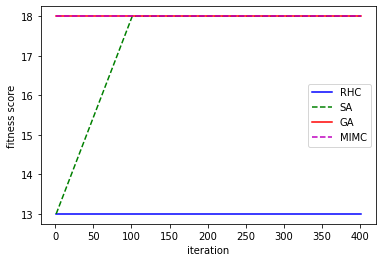

In [86]:
# plot fitness score vs iterations
plotAgainstIteration(max_iters_array, fitness_score_algo_array, "iteration", "fitness score", "TSP_4_search_algo_with_their_fitness_score_vs_iterations")

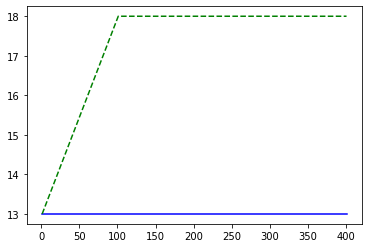

In [87]:
plt.plot(max_iters_array, fitness_score_algo_array[0], 'b', label='RHC')
plt.plot(max_iters_array, fitness_score_algo_array[1], 'g', label='SA', linestyle="--")

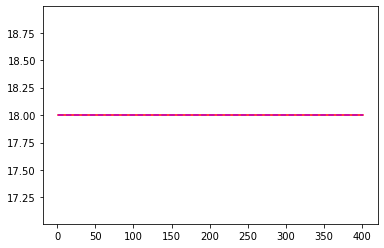

In [88]:
# GA
plt.plot(max_iters_array, fitness_score_algo_array[2], 'r', label='GA')
plt.plot(max_iters_array, fitness_score_algo_array[3], 'm', label='MIMC', linestyle="--")


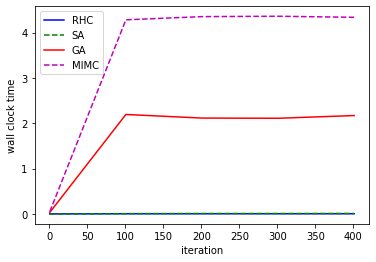

In [89]:
# plot wall clock time vs iteration
plotAgainstIteration(max_iters_array, wall_clock_time_algo_array, "iteration", "wall clock time", "TSP_4_search_algo_with_their_wall_clock_time_vs_iterations")

In [90]:
# problem size
# 全部重走一遍？！！
wall_clock_time_with_sizes_array = []
fitness_score_with_sizes_array = []
function_evaluation_with_sizes_array = []

for i in range(len(algo_func_array)):
    cur_algo_clock_time = []
    cur_fitness_score = []
    function_evaluation = []
    for j in range(len(sizes)):
        fitness_func = mlrose.Knapsack(weights_array[j], values_array[j], max_weight_pct = 0.6)
        problem_fit = mlrose.DiscreteOpt(length = sizes[j], fitness_fn = fitness_func, maximize=True, max_val=2)
        startTime = time.time()
        best_state, best_fitness, fitness_curve = algo_func_array[i](problem_fit,
                                                          max_attempts = 100, random_state = 2, 
                                                          curve = True, max_iters = 200)
        endTime = time.time()
        cur_algo_clock_time.append(endTime - startTime)
        cur_fitness_score.append(fitness_curve[:,0][-1])
        function_evaluation.append(fitness_curve[:,1][-1])
        
    wall_clock_time_with_sizes_array.append(cur_algo_clock_time)
    fitness_score_with_sizes_array.append(cur_fitness_score)
    function_evaluation_with_sizes_array.append(function_evaluation)

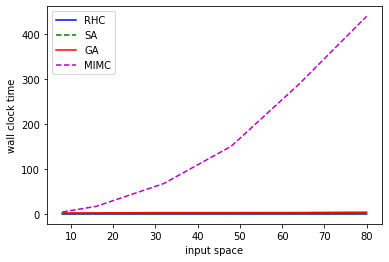

In [91]:
# plot wall clock time vs input size
plotAgainstIteration(sizes, wall_clock_time_with_sizes_array, "input space", "wall clock time", "TSP_4_search_algo_with_their_wall_clock_time_vs_input_space")

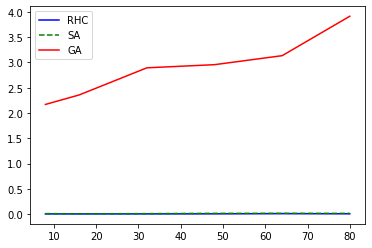

In [92]:
# plot wall clock time vs input size
plt.plot(sizes, wall_clock_time_with_sizes_array[0], 'b', label='RHC')
plt.plot(sizes, wall_clock_time_with_sizes_array[1], 'g', label='SA', linestyle="--")
plt.plot(sizes, wall_clock_time_with_sizes_array[2], 'r', label='GA')
plt.legend()
plt.show()

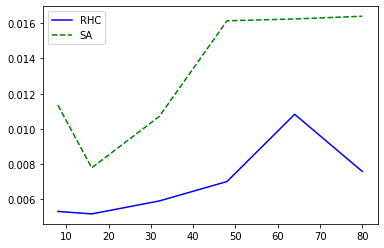

In [93]:
# plot wall clock time vs input size
plt.plot(sizes, wall_clock_time_with_sizes_array[0], 'b', label='RHC')
plt.plot(sizes, wall_clock_time_with_sizes_array[1], 'g', label='SA', linestyle="--")
plt.legend()
plt.show()

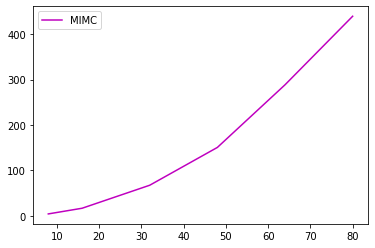

In [94]:
plt.plot(sizes, wall_clock_time_with_sizes_array[3], 'm', label='MIMC')
plt.legend()
plt.show()

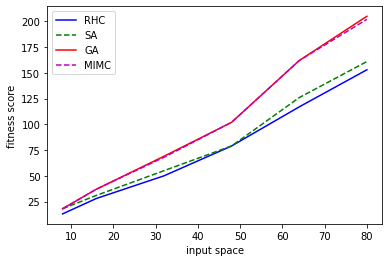

In [95]:
# plot fitness score vs input size
plotAgainstIteration(sizes, fitness_score_with_sizes_array, "input space", "fitness score", "TSP_4_search_algo_with_their_fitness_score_vs_input_space")

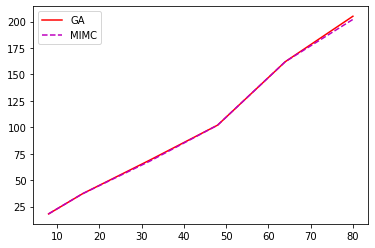

In [96]:
# plot fitness score vs input size
plt.plot(sizes, fitness_score_with_sizes_array[2], 'r', label='GA')
plt.plot(sizes, fitness_score_with_sizes_array[3], 'm', label='MIMC', linestyle="--")
plt.legend()
plt.show()

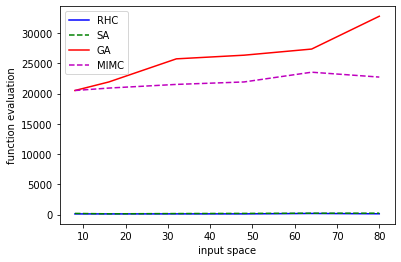

In [97]:
# plot function evaluation vs input size
plotAgainstIteration(sizes, function_evaluation_with_sizes_array, "input space", "function evaluation", "TSP_4_search_algo_with_their_function_evaluation_vs_input_space")


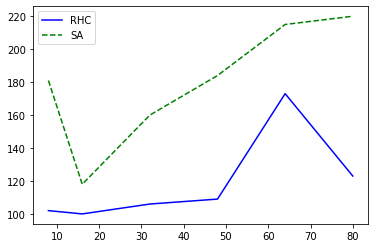

In [98]:
# plot function evaluation vs input size
plt.plot(sizes, function_evaluation_with_sizes_array[0], 'b', label='RHC')
plt.plot(sizes, function_evaluation_with_sizes_array[1], 'g', label='SA', linestyle="--")
plt.legend()
plt.show()